<a href="https://colab.research.google.com/github/arezyhs/Interpolasi-Lagrange/blob/main/Lagrange_Interpolation_Laju%20Aliran%20Massa%20Pasir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Studi Kasus: Prediksi Laju Aliran Massa Pasir (g/s) dengan Interpolasi Lagrange

Dalam studi kasus ini, kita menerapkan **Interpolasi Lagrange** untuk memprediksi Laju Aliran Massa Pasir (g/s) berdasarkan Laju Erosi Pipa (mm/year). Metode ini memungkinkan kita memperkirakan nilai di antara titik-titik data yang sudah ada menggunakan interpolasi polinomial.

---

**Author:** arezyh.s


Tabel Hasil Prediksi dan Galat untuk Orde 1 berdasarkan Interpolasi Lagrange:
   Laju Aliran Massa Pasir (g/s)  Y Aktual  Y Prediksi  Galat Orde
0                       0.224000  0.019265    0.012946    0.006319
1                       0.420000  0.078132    0.078132    0.000000
2                       0.597000  0.136999    0.136999    0.000000
3                       0.693000  0.188111    0.168927    0.019185
4                       0.789000  0.239224    0.200854    0.038370

Evaluasi Error untuk Orde 1:
  Error Relatif (%)    : 11.81%
  Korelasi Pearson (R) : 0.9909
  R-Squared            : 0.9818
  MAPE (%)             : 11.81%
  Batas Error Lagrange : 0.001771

Orde 1:
  Prediksi untuk X = 0.5 adalah 0.104739
  Batas Error Lagrange (Manual): 0.001771
  Persamaan Polinomial Lagrange untuk Orde 1 :
0.332580197740113⋅x - 0.0615515250508475
--------------------------------------------------

Tabel Hasil Prediksi dan Galat untuk Orde 2 berdasarkan Interpolasi Lagrange:
   Laju Aliran Ma

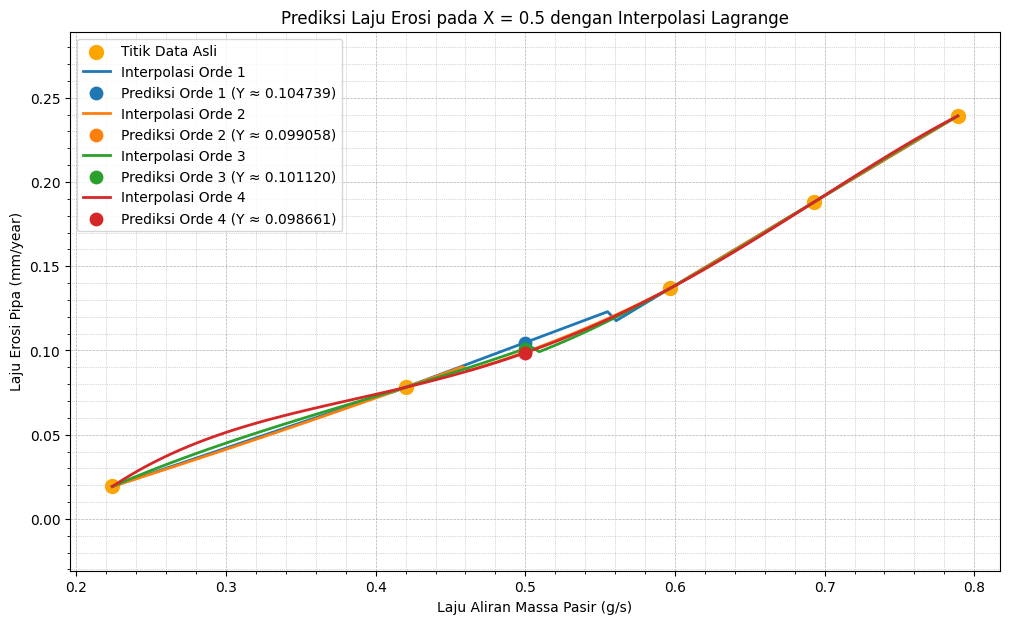

In [7]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import pandas as pd
import math
from decimal import Decimal, getcontext

# Set precision untuk Decimal dan pengaturan tampilan pandas
getcontext().prec = 6
pd.options.display.float_format = '{:.6f}'.format

# Data untuk Laju Aliran Massa Pasir (g/s) dan Laju Erosi Pipa (mm/year)
data_x = np.array([0.224, 0.420, 0.597, 0.693, 0.789])
data_y = np.array([0.019265464, 0.078132158, 0.136998853, 0.188111308, 0.239223762])

# Membuat variabel simbolik untuk x
x = sp.symbols('x')

# Fungsi untuk membentuk polinomial Lagrange simbolik berdasarkan titik terdekat
def lagrange_polynomial(x_values, y_values):
    n = len(x_values)
    polynomial = 0
    for i in range(n):
        term = y_values[i]
        for j in range(n):
            if i != j:
                term *= (x - x_values[j]) / (x_values[i] - x_values[j])
        polynomial += term
    return sp.expand(polynomial)  # Tidak disederhanakan (expand instead of simplify)

# Fungsi interpolasi polinomial Lagrange
def lagrange_interpolation(x_values, y_values, x_target, order):
    idx = np.argsort(np.abs(x_values - x_target))[:order + 1]
    x_selected = x_values[idx]
    y_selected = y_values[idx]
    lagrange_poly = lagrange_polynomial(x_selected, y_selected)
    interpolated_value = sp.lambdify(x, lagrange_poly, 'numpy')(x_target)
    return interpolated_value, lagrange_poly

# Fungsi untuk menghitung batas error Lagrange secara manual
def lagrange_error_bound_manual(x_values, y_values, x_target, order):
    idx = np.argsort(np.abs(x_values - x_target))[:order + 2]
    x_selected = x_values[idx]
    y_selected = y_values[idx]
    second_derivative = 0
    if order + 1 < len(x_selected):
        x0, x1, x2 = x_selected[:3]
        y0, y1, y2 = y_selected[:3]
        second_derivative = (y2 - 2 * y1 + y0) / ((x2 - x1) * (x1 - x0))
    product_term = Decimal(1)
    for xi in x_selected[:order + 1]:
        product_term *= Decimal(float(x_target - xi))
    error_estimate = abs(second_derivative * float(product_term) / math.factorial(order + 1))
    return error_estimate

# Fungsi untuk menghitung metrik error
def calculate_error_metrics(y_actual, y_pred):
    error_relatif = np.mean(np.abs(y_actual - y_pred) / y_actual) * 100
    R = np.corrcoef(y_actual, y_pred)[0, 1]
    R_squared = R ** 2
    MAPE = np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100
    return error_relatif, R, R_squared, MAPE

# Nilai x target yang dekat dengan range data
x_target = 0.500

# Proses interpolasi dan evaluasi error untuk berbagai orde
higher_order_predictions = {}
lagrange_polynomials = {}
error_bounds = {}
results_tables = {}
max_order = min(4, len(data_x) - 1)

for order in range(1, max_order + 1):
    prediction, poly = lagrange_interpolation(data_x, data_y, x_target, order)
    higher_order_predictions[order] = prediction
    lagrange_polynomials[order] = poly
    error_bounds[order] = lagrange_error_bound_manual(data_x, data_y, x_target, order)
    y_pred = np.array([sp.lambdify(x, lagrange_polynomials[order], 'numpy')(xi) for xi in data_x])
    galat = np.abs(data_y - y_pred)
    results_table = pd.DataFrame({
        "Laju Aliran Massa Pasir (g/s)": data_x,
        "Y Aktual": data_y,
        f"Y Prediksi": y_pred,
        f"Galat Orde": galat
    }).round(6)
    results_tables[order] = results_table
    error_relatif, R, R_squared, MAPE = calculate_error_metrics(data_y, y_pred)

    # Menampilkan tabel hasil dan evaluasi error untuk tiap orde
    print(f"\nTabel Hasil Prediksi dan Galat untuk Orde {order} berdasarkan Interpolasi Lagrange:")
    print(results_table)

    print(f"\nEvaluasi Error untuk Orde {order}:")
    print(f"  Error Relatif (%)    : {error_relatif:.2f}%")
    print(f"  Korelasi Pearson (R) : {R:.4f}")
    print(f"  R-Squared            : {R_squared:.4f}")
    print(f"  MAPE (%)             : {MAPE:.2f}%")
    print(f"  Batas Error Lagrange : {error_bounds[order]:.6f}")

    # Menampilkan hasil prediksi, batas error, dan persamaan polinomial Lagrange dengan format yang lebih jelas
    print(f"\nOrde {order}:")
    print(f"  Prediksi untuk X = {x_target} adalah {higher_order_predictions[order]:.6f}")
    print(f"  Batas Error Lagrange (Manual): {error_bounds[order]:.6f}")
    print("  Persamaan Polinomial Lagrange untuk Orde", order, ":")
    sp.pretty_print(lagrange_polynomials[order])
    print("-" * 50)

# Plotting hasil dengan detail tambahan
plt.figure(figsize=(12, 7))
plt.scatter(data_x, data_y, color='orange', s=100, label='Titik Data Asli')  # Titik data asli lebih besar
x_range = np.linspace(min(data_x), max(data_x), 100)

# Tambahkan perbaikan pada plot untuk setiap orde
for order in range(1, max_order + 1):
    y_interp = [lagrange_interpolation(data_x, data_y, x, order)[0] for x in x_range]
    plt.plot(x_range, y_interp, label=f'Interpolasi Orde {order}', linewidth=2)  # Garis lebih tebal
    plt.scatter(x_target, higher_order_predictions[order], s=80, label=f'Prediksi Orde {order} (Y ≈ {higher_order_predictions[order]:.6f})', zorder=5)

# Pengaturan detail tambahan untuk plot
plt.xlabel('Laju Aliran Massa Pasir (g/s)')
plt.ylabel('Laju Erosi Pipa (mm/year)')
plt.title(f'Prediksi Laju Erosi pada X = {x_target} dengan Interpolasi Lagrange')
plt.ylim(min(data_y) - 0.05, max(data_y) + 0.05)  # Menyesuaikan batas y agar lebih ketat
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()  # Aktifkan grid minor
plt.grid(which='minor', linestyle=':', linewidth=0.5)  # Tambahkan grid minor
plt.show()